# Prototype - Optimized COVID Vaccine Distribution in UP, INDIA


## <font color='orange'> Introduction </font>

Uttar Pradesh is the most populous state in India, with a population of over 200 million people, accounting for 16% of the national population of India in 2020 (Bagal et al., 2020). As the COVID Pandemic spread across the world, the spread was even exponenetial in India's state of UP due to overpopulation. In this paper, we model the spread of the COVID 19 infectious diseaese in the state of UP, India using SIR modeling and devise an optimized vaccine distribution mechanism to help recover people effectively.

### Map of Uttar Pradesh, India
source: (Google maps, 2022)

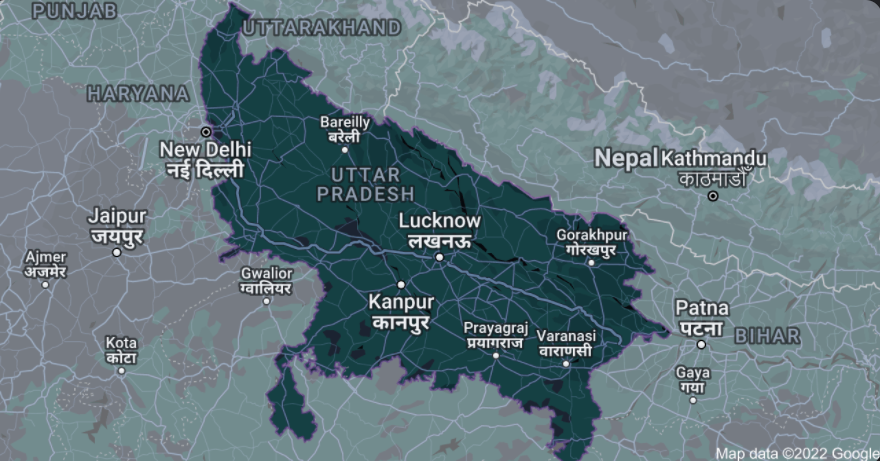

## <font color='orange'> SIMULATION: SIR Modeling COVID 19 for UP, India</font>


The SIR model is a simple mathematical model used to describe the dynamics of infectious diseases in a population. It's a compartmental model, dividing the population into three categories, which form the basis of its name:<br>

S: Susceptible - the group of people who are vulnerable to the disease because they have not yet been infected.<br>

I: Infectious - the group of people who have the disease and can spread it to the susceptible population.<br>

R: Recovered/Removed - the group of people who have recovered from the disease and now have immunity, or who have died.<br>



### **Numerical Modeling and Simulation**

Using the SIR model to see the effect of COVID-19 spread in Uttar Pradesh, India involves setting the initial conditions according to the population of the state, the number of initial infections, and the number of recoveries. We then use this model to predict the future course of the epidemic, assuming various levels of social distancing or vaccination.

We consider the SIR model described by the set of differential equations below, and then do a numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>

$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>

$$ \frac{dR}{dt} = k I(t) $$
<br>

## <font color='green'>**COVID-19, an analysis of the spread in UP, India:**</font> <br>

**Variables:**<br>

1. **Independent variables:**<br>
    1. ***Time:*** <br>
        A quantitative continuous variable as it can be measured and can take any decimal value<br>between two numbers based on the accuracy of measuring device. The SIR model also uses it as <br>a continuous variable in the differential equations<br>
        However, here in our interpretation we measure time in days (unit) so it can be <br>considered discrete as days are whole numbers.<br>
    2.  ***Population of the state of UP, India, N:***<br>
        Quantitative discrete variable as number of individuals is a whole number (e.g. 10 people). <br>
        India’s population (N) is estimated at 237 million people in 2020 (Bagal et al., 2020).<br>

2. **Dependent variables:**<br>
        ***S:*** number of susceptible individuals (unit = people)<br>
        ***I:*** number of susceptible individuals (unit = people)<br>
        ***R:*** number of susceptible individuals (unit = people)<br>
        As we are simulating the spread of disease, we will have a few infected individuals to start the model. <br>So, we assume I = 20 people. <br>
        Initially, there will be no recovered people, R = 0 people. <br>
        As, N = S + I + R, thus, <br>
        ***S = 237,095,024 - 20 - 0 = 237,095,004 people (237 million).***<br>

    ***Note:*** S(t), I(t), R(t) will be treated as continuous functions of time (t) as differential equations require continuous variables/data.<br>
    For the scope of this paper SIR model won’t account for deaths.<br>


**Parameters** <br>
Our model has the following parameters that go into the data as constants, <br>initialized before it runs and will change based on real-world scenario input.<br>
1. ***Infection rate (b):*** denotes the average number of transmissions from an infected person in a time period (day).<br> For COVID-19 in the state of UP in India, b = 0.24 = 6/25 (Bagal et al., 2020). <br>
This shows an infected individual will come in contact to infect 6 susceptible individuals every 25 days,<br> spreading the disease, until they recover<br>
A higher valuer of b means an individual will infect more people per day, thus spread of covid will increase.<br>
The value of b can be influenced based on age groups (old and young people) and immunity.<br>

2. ***Recovery rate (k):*** denotes how long (days) an infected person (I) will be infectious (capable of spreading COVID)<br> before recovering (R). It is the reciprocal of infectious period (day).<br> For COVID in India, k = 0.02 (Bagal et al., 2020). 
So infectious period = 0.02 = 1/50 <br>
This shows that an infected individual will recover from COVID in 50 days.<br>
A higher value of k means people will recover faster (in less days), thus recovered people will increase,<br> stopping the spread of COVID. <br>
The value of k can be increased by better medical facilities and effective distribution of vaccines as outlined earlier in the paper. <br> 

<font color='orange/'>**Euler's Method**</font>
<br>
The SIR **model** has three differential equations. Too complex to be solved analytically, the Euler’s method is a **simulation** of this model to provide numerical values (solution sets) which best approximate the real, analytic values.<br>
However, in reality, solutions to differential equations are in the form of functions.<br>

**The Euler's method algorithm:**<br> 

***Inputs:***<br>
1. Initial conditions- values for time (simulation runs for 365 days), population (people in UP, India), S, I, and R (susceptible, infected and recovered people from COVID in India), parameters (b and k)<br>
2. Differential equations from the SIR model (Three equations)<br>
3. Stepsize (h = 1) (used in the estimation of S and I by multiplying with increment at every iteration, a smaller step size will reduce error, giving a more accurate approximation of the real values, however, if it is too small it can cause overiftting)<br>

***Steps:***<br>
1. Initialize the values for time, population, S, I, and R, and parameters (b and k)<br>
2. Calculate the values for S, I, and R using the Euler’s method formula’s for calculating S[n+1], I[n+1], and R [n+1].<br>
3. Repeat step 2 for the number of specified steps (here, 365 days)<br>		
4. The iterations will stop when it runs for the number of specified steps is reached (here), or if there is no significant improvement in numerical answers. <br>
5. Plot the values for S, I, and R against time (days) <br>

***Output:***<br>
    Numerical values (solution sets) for S, I, and R, approximately equal to the real, analytical value.

#### Euler’s Method Implementation in Python

We define a function that implements a numerical simulation to derive the implications of our model using Euler’s method in Python. We generate the relevant visualization of the disease dynamics, including a descriptive figure legend and caption. We adjust the run-time and step size in your simulation accordingly, to ensure the visualization is maximally informative.

In [408]:
# importing relevant libraries such as numpy (math library) and matplotlib (plotting library)
import numpy as np
import matplotlib.pyplot as plt
#changes font size and length and width of graph to be plotted
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]

#defines the function of Euler method for SIR model
def SIR_Euler(b,k,initial_conds):
    t0 = 0 
    #time at the start of the simulation (0 days, simulates from beginning of year 2020)
    t_end = 365
    #simulation runs for an entire year (365 days)

    h = 1
    # specifies the step size to 1 
    #we take step size of 1 as it is small but not too 
    #small for potential overfitting
    
    steps = int((t_end - t0)/h + 1)
    #the number of steps of the simulation running

    # defines variables (independent & dependent):
    t = np.linspace(t0, t_end, steps) 
    # for storing the values of time, t
    S = np.zeros(steps)
    #for storing the values of S 
    I = np.zeros(steps)
    #for storing the values of I
    R = np.zeros(steps) 
    #for storing the values of R 

    #initial conditions for Euler's method for S, I, and R:
    S[0] = initial_conds[0] 
    I[0] = initial_conds[1] 
    R[0] = initial_conds[2]
    N = S[0]+I[0]+R[0]
    #Population of India is the sum of infected, recovered and susceptible people from COVID

    for n in range(steps-1): 
    # for loop which runs steps-1 times
    #this iteration is used by Euler's method to best approximate the 
    #numerical solution sets to real analytic values
    #based on repeated calculations of S[n+1], R[n+1], and R[n+1]
    #with stepsize, h=1, used to minimze error between the numerical and analytic values
    
        S[n+1] = S[n] + (-b/N*S[n]*I[n])*h
        #Euler's method formula for S calculation
        
        I[n+1] = I[n] + (b/N * S[n]*I[n] - k*I[n])*h
        #Euler's method formula for I calculation
        
        R[n+1] = R[n] + k*I[n] 
        #Euler's method formula for R calculation
    
    #plots the values of S, I, and R on the output graph
    plt.plot(t,S,linewidth=2,label='S(t)') 
    plt.plot(t,I,linewidth=2,label='I(t)')
    plt.plot(t,R,linewidth=2,label='R(t)')
    
    #labels the x, and y axes of the graph 
    #as time in days and S, I, and R
    plt.xlabel('time (days)')
    plt.ylabel('S, I, R (x 10^8 people)')
    #plots the legend associating S, I, and R with respective line color on the graph
    plt.legend(loc='best')  
    #plots the graph
    plt.show()    
    print('Figure: The graph above visualizes the simulated response to COVID \n\
        within the population of UP, India in Year 2020 (Bagal et al., 2020).\n\
        The x-axis is labelled as time (days) as independent variable. \n\
        The y-axis is labelled as S, I, and R (people) and the decimal value is x10^8.\n\
        S(t), I(t), and R(t) vary as the continuous functions of time, \n\
        showing the change in susceptible, infected, and recovered people\n\
        in the population of UP, India from COVID over a period of 1 year. \n\
        The legend associates S, I, and R with respective line color on the graph (blue, orange, green)')


<font color='orange'>**Simulation & Modeling**</font>

Below, we interpret the results of the numerical simulation by making reference the output in the visualization(s) below. We re-run the simulation above multiple times with varying parameter inputs ($b$ and $k$) and observe the behavior of our model.  


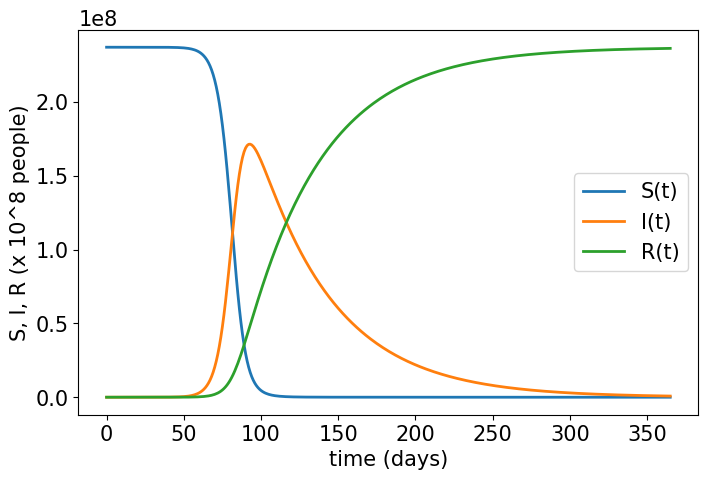

Figure: The graph above visualizes the simulated response to COVID 
        within the population of UP, India in Year 2020 (Bagal et al., 2020).
        The x-axis is labelled as time (days) as independent variable. 
        The y-axis is labelled as S, I, and R (people) and the decimal value is x10^8.
        S(t), I(t), and R(t) vary as the continuous functions of time, 
        showing the change in susceptible, infected, and recovered people
        in the population of UP, India from COVID over a period of 1 year. 
        The legend associates S, I, and R with respective line color on the graph (blue, orange, green)


In [409]:
# Case 1: "infection_rate" = 0.24 and "recovery_rate = 0.02"

#inputs values of the parameters b and k from data on COVID for the state of UP in India (Bagal et al., 2020).
infection_rate = 0.24
#an infected individual infects 6 susceptible people every 25 days, 

recovery_rate = 0.02
#an individual in India recovers from COVID in 50 days 
# as, recovery time = 1/rate = 1/0.02 = 50 

#inputs initial conditions as values for S, I, and R: 

I0 = 20 #initial number of infected people in India in 2020
S0 = 237095024 - I0 #total population of UP, India in 2020 being 237 million (Bagal et al., 2020)
R0 = 0 #no one has recovered from COVID at the start of the simulation

#stores the values in the variable
initial_vals = [S0,I0,R0]
 
#recalls the function to run the simulation of Euler's method,
#this executes all the commands in the function
SIR_Euler(infection_rate, recovery_rate, initial_vals)
#the function has three parameters: 
#infection_rate (b), recovery_rate (k), initial_vals (of S, I, and R)

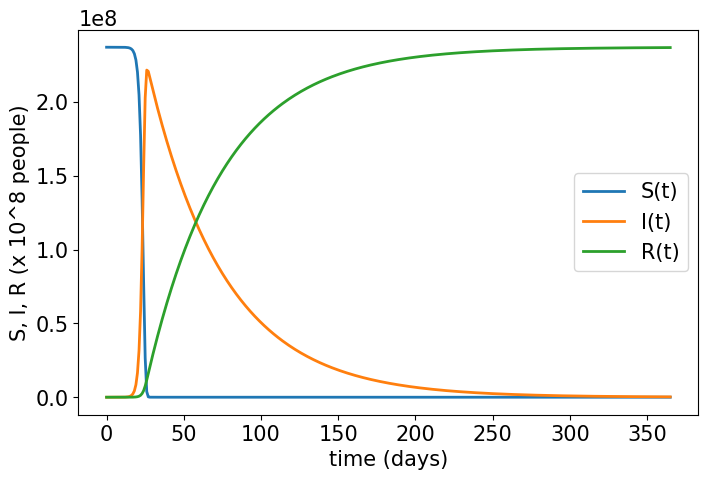

Figure: The graph above visualizes the simulated response to COVID 
        within the population of UP, India in Year 2020 (Bagal et al., 2020).
        The x-axis is labelled as time (days) as independent variable. 
        The y-axis is labelled as S, I, and R (people) and the decimal value is x10^8.
        S(t), I(t), and R(t) vary as the continuous functions of time, 
        showing the change in susceptible, infected, and recovered people
        in the population of UP, India from COVID over a period of 1 year. 
        The legend associates S, I, and R with respective line color on the graph (blue, orange, green)


In [410]:
# Case 2: "infection_rate" = 1 and "recovery_rate = 0.02"

#inputs values of the parameters b and k from data on COVID for the state of UP in India (Bagal et al., 2020).
infection_rate = 1
#an infected individual infects 1 susceptible individual everyday, 

recovery_rate = 0.02
#an individual in India recovers from COVID in 50 days 
# as, recovery time = 1/rate = 1/0.02 = 50 

#inputs initial conditions as values for S, I, and R: 

I0 = 20 #initial number of infected people in India in 2020
S0 = 237095024 - I0 #total population of UP, India in 2020 being 237 million (Bagal et al., 2020)
R0 = 0 #no one has recovered from COVID at the start of the simulation

#stores the values in the variable
initial_vals = [S0,I0,R0]
 
#recalls the function to run the simulation of Euler's method,
#this executes all the commands in the function
SIR_Euler(infection_rate, recovery_rate, initial_vals)
#the function has three parameters: 
#infection_rate (b), recovery_rate (k), initial_vals (of S, I, and R)

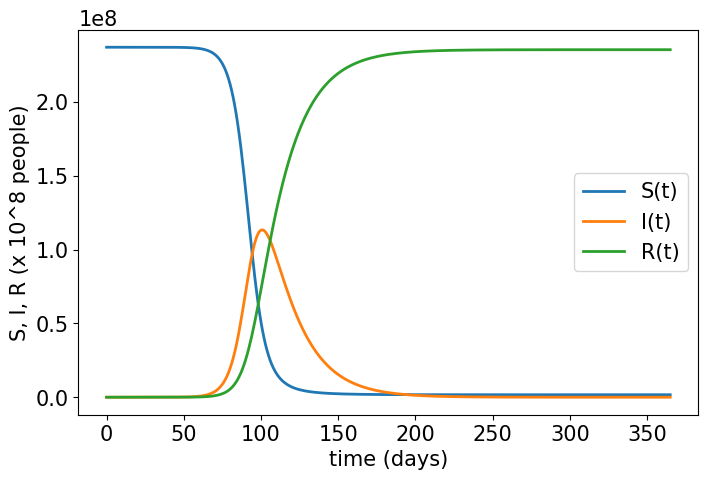

Figure: The graph above visualizes the simulated response to COVID 
        within the population of UP, India in Year 2020 (Bagal et al., 2020).
        The x-axis is labelled as time (days) as independent variable. 
        The y-axis is labelled as S, I, and R (people) and the decimal value is x10^8.
        S(t), I(t), and R(t) vary as the continuous functions of time, 
        showing the change in susceptible, infected, and recovered people
        in the population of UP, India from COVID over a period of 1 year. 
        The legend associates S, I, and R with respective line color on the graph (blue, orange, green)


In [411]:
# Case 3: "infection_rate" = 0.24 and "recovery_rate = 0.05"

#inputs values of the parameters b and k from data on COVID for the state of UP in India (Bagal et al., 2020).
infection_rate = 0.24
#an infected individual infects 6 susceptible people every 25 days, 

recovery_rate = 0.05
# an individual in India recovers from COVID in 20 days 
# as, recovery time = 1/rate = 1/0.05 = 20 

#inputs initial conditions as values for S, I, and R: 

I0 = 20 #initial number of infected people in India in 2020
S0 = 237095024 - I0 #total population of UP, India in 2020 being 237 million (Bagal et al., 2020)
R0 = 0 #no one has recovered from COVID at the start of the simulation

#stores the values in the variable
initial_vals = [S0,I0,R0]
 
#recalls the function to run the simulation of Euler's method,
#this executes all the commands in the function
SIR_Euler(infection_rate, recovery_rate, initial_vals)
#the function has three parameters: 
#infection_rate (b), recovery_rate (k), initial_vals (of S, I, and R)

<font color='orange'>**Results and Graphical Interpretation**</font>
<br>
Euler's method works as a simulation to numerical solution sets that best estimate the real analytic values for the functions of S(t), I(t), and R(t), with time, t. It visualizes the simulated response to COVID within the population of 237 million people in India's most populous state of UP in the Year 2020. We see the Infected people in the population at the very start (initialized 20) grow slowly at first according to the infection rate (b), and then increase exponentially afterwards. This shows that as the number of infected people increases, they infect more and more people causing an exponential increase in Infected people rather than a linear one. <br>

**Scenario 1:** <br>
An infection rate b = 6/25 shows an infected individual infects 6 susceptibleindividuals every 25 days. As this is much higher than recovery rate of 1/0.02 = 50 days (infected individual recovers in 50 days), thus we see the infected number of people rise to nearly 1.7 x10^8 = **170 million people**, before the cases declined as the number of recovered people increased more then the infected individuals after nearly 130 days (4 months).<br>
**Scenario 2:** <br>
We see how an increase in infection rate to and individual infecting one individual every day with constant recovery rate, drastically infects nearly the entire population (~220 million people) in the first 30 days (1 months), before the population recovers gradually and **herd immunity** is developed after nearly 250 days.<br>
**Scenario 3:** <br>
This scenario shows that with increase in recovery rate to individual recovering in 1/0.05 = 20 days, and constant infection rate as scenario 1, the spike in COVID cases settles after affecting nearly half the population (110 million people in UP, India) in 120 days (3 months) and then as recovered people increases, herd immunity is developed after nearly 180 days (6 months). <br>


## <font color='orange'>**Effective vaccine distribution across 15 major cities in Uttar Pradesh, India:**</font> <br>
To prevent the spread of the COVID-19 infectious disease, the COVID vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities of UP, India that have had major outbreaks. We aim to optimize the route between these cities sp that the vaccine can be distributed in the shortest amount of time.
After an initial analysis of the road infrastructure and ground transportation system in the 15 cities of UP, India, we hypothesize that shorter the distance, less time will it take to cover it using a ground vehicle. Hence, we aim to optimize the distance traveled by selecting the path with the shortest distance, resulting in less time overall for vaccine distribution. <br>
We will also conduct an SIR model analysis later on to check for the virus spread containment, post vaccine distribution (included in later part of the paper). <br>

**Optimization Problem:** <br>
	To quickly distribute COVID vaccine in the 15 Indian cities of the state of Uttar Pradesh by finding the shortest land route.
 <br>
***Objective function:*** <br>
	To minimize the total traveling distance for the route to visit the 15 cities. <br>
**Objective value:** <br>
	Distance (Quantitative continuous variable). <br>
	Distance is measured quantitatively and is continuous as the distance between two cities (e.g. Lucknow and Kanpur, here) can take up any value between the range of two numbers, limited only by the precision of the measuring instrument. <br>
	The unit of distance here is Kilometres (Km), the metric used by the Indian government to calculate distance of public roads.
 <br>
**Decision Variable:** <br>
	An ordered list of the arrangement of 15 cities to visit in UP, India, e.g. visit Lucknow first, then Kanpur, etc. This will guide local authorities, distributing the vaccine, on which route to take with the shortest distance for time efficiency.
 <br>
**Constraint:** <br>
	A constraint in this scenario is that all 15 cities have to be visited, and can be visited only once, to distribute vaccines.<br> Another constraint is the availability of ground transportation only, as flying an airplane or helicopter might not be very economical. Hence, to carry a significant amount of vaccines per trip, we recommend using a car for the distribution.

#### Map of Uttar Pradesh, India
source: (Google maps, 2022)

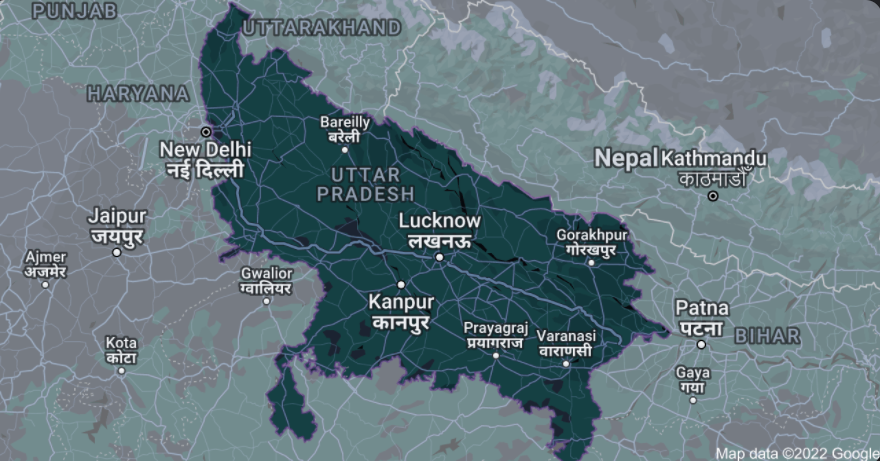


#### <font color='orange'>**Genetic Algorithm:**</font><br>
The genetic algorithm used in the provided code provides a viable optimization technique for solving the vaccine distribution problem. By iteratively evolving a population of routes through selection, breeding, and mutation, the algorithm explores the solution space and converges to a high-quality solution. However, further analysis and experimentation are recommended to fine-tune the parameters and evaluate the performance of the algorithm on larger problem instances.<br>

#### Outline  <br>
We implement a genetic algorithm for solving the vaccine distribution problem in Uttar Pradesh, India:

1. ***Problem Description:*** <br>

The problem is to find the shortest distance route for delivering vaccines to 15 cities in Uttar Pradesh, India.
The objective is to minimize the total distance traveled, fore delivering vaccine in minimal time.

2. ***Genetic Algorithm Overview:*** <br>

Genetic algorithms are a population-based metaheuristic optimization technique inspired by the process of natural selection.
The algorithm starts with an initial population of routes, where each route represents a potential solution to the problem.
The algorithm iteratively evolves the population over generations by applying selection, breeding, and mutation operations to improve the quality of the solutions.

3. ***Representation:*** <br>

The routes are represented as lists of cities, where each city is a City object.
The order of cities in the route represents the sequence in which the cities are visited.

4. ***Initialization:*** <br>

The initial population is created by generating random routes using the create_initial_population function.
e.g. a population size of 100, means 100 of individuals (routes) generated in each generation.

5. ***Fitness Evaluation:*** <br>

The fitness of a route is calculated using the route_fitness function, which is the inverse of the route distance.
The route distance is computed by summing the distances between consecutive cities in the route.
Routes with shorter distances have higher fitness scores.

6. ***Selection:*** <br>

The select_parents function performs selection to choose parents for breeding based on their fitness scores.
The selection is based on a cumulative probability distribution, where individuals with higher fitness have a higher chance of being selected and are directly carried over to the next generation.

7. ***Breeding:*** <br>

The breed_population function performs breeding to create a new population of children routes.
It starts by selecting pairs of parents from the mating pool (including the elite individuals).
The children routes are created by combining a subset of cities from one parent and filling the remaining cities from the other parent in the order they appear.

8. ***Mutation:*** <br>

The mutate_population function applies mutation to the population by randomly swapping cities in individual routes.
A mutation rate of 0.1 means there is a 10% probability of a gene (city) being randomly altered during breeding.

9. ***Termination:*** <br>

The genetic algorithm runs for a fixed number of generations.
After each generation, the best route from the current generation is stored.

10. ***Fitness Landscape and Exploration:*** <br>

The fitness landscape represents the relationship between solutions and their fitness scores.
In this case, the landscape is a combinatorial optimization problem with the goal of minimizing the route distance.
The genetic algorithm explores the landscape by maintaining diversity in the population, allowing for the exploration of different regions of the solution space.

11. ***Solution Evaluation:*** <br>
After the genetic algorithm terminates, the best route found is selected as the solution.
The total distance of the best route is calculated by summing the distances between consecutive cities.

***Advantages of Genetic Algorithms:*** <br>
1. Genetic algorithms can handle complex optimization problems with large search spaces.
2. They are population-based and can maintain diversity, enabling exploration of different solutions.
3. The use of selection, breeding, and mutation operations allows for adaptive and robust search.<br>

***Limitations of Genetic Algorithms:*** <br>
1. Genetic algorithms are heuristic methods and do not guarantee finding the global optimal solution.
2. The performance of genetic algorithms can be sensitive to parameter settings.
3. They may require a large number of evaluations (generations) to converge to a satisfactory solution.

Since our scope for this problem is for 15 cities in a single state of UP, India, and it is crucial to find the shortest distance in a timely manner, we have chosen to use Genetic Algorithm for this problem.

<font color='green'>**Python Implementation - Genetic Algorithm:**</font><br>

Below we write the Python implementation of our Genetic Algorithm for the vaccine distribution problem in Uttar Pradesh, India.

In [3]:
import numpy as np
import random
import operator
import pandas as pd

class City:
    """
    Represents a city with its name and distances to other cities.
    """

    def __init__(self, name):
        """
        Initializes a City instance.

        Args:
            name (str): The name of the city.
        """
        self.name = name
        self.distances = {}

    def add_distance(self, other_city, distance):
        """
        Adds the distance from this city to another city.

        Args:
            other_city (City): The other city.
            distance (float): The distance between the two cities.
        """
        self.distances[other_city] = distance

    def distance_to(self, other_city):
        """
        Returns the distance from this city to another city.

        Args:
            other_city (City): The other city.

        Returns:
            float: The distance between the two cities.
        """
        return self.distances.get(other_city, float('inf'))

    def __str__(self):
        """
        Returns the name of the city when the object is converted to a string.

        Returns:
            str: The name of the city.
        """
        return self.name

def create_route(city_list):
    """
    Creates a random route by shuffling the list of cities.

    Args:
        city_list (list): The list of City objects.

    Returns:
        list: The random route.
    """
    route = city_list[:]
    route.remove(cities["Lucknow"])  # Remove "Lucknow" from the route
    random.shuffle(route)  # Shuffle the remaining cities randomly
    route.insert(0, cities["Lucknow"])  # Add "Lucknow" as the first city
    return route

def create_initial_population(pop_size, city_list):
    """
    Creates the initial population of random routes.

    Args:
        pop_size (int): The size of the population.
        city_list (list): The list of City objects.

    Returns:
        list: The initial population.
    """
    population = []
    for _ in range(0, pop_size):
        population.append(create_route(city_list))
    return population

def route_distance(route):
    """
    Calculates the total distance of a route.

    Args:
        route (list): The route to calculate the distance for.

    Returns:
        float: The total distance of the route.
    """
    if route[0].name != 'Lucknow':
        while cities["Lucknow"] in route:
            route.remove(cities["Lucknow"])
        route.insert(0, cities['Lucknow']) 
    return sum([route[i-1].distance_to(route[i]) for i in range(1, len(route))])

def route_fitness(route):
    """
    Calculates the fitness of a route, which is the inverse of the route distance.

    Args:
        route (list): The route to calculate the fitness for.

    Returns:
        float: The fitness of the route.
    """
    return 1 / float(route_distance(route))

def rank_routes(population):
    """
    Ranks the routes in the population based on their fitness.

    Args:
        population (list): The population of routes.

    Returns:
        list: The ranked population.
    """
    fitness_results = {i: route_fitness(population[i]) for i in range(0, len(population))}
    return sorted(fitness_results.items(), key=operator.itemgetter(1), reverse=True)

def select_parents(ranked_population, elite_size):
    """
    Selects parents from the ranked population for the mating pool.

    Args:
        ranked_population (list): The ranked population of routes.
        elite_size (int): The number of elite individuals to select as parents.

    Returns:
        list: The indices of the selected parents.
    """
    selection_results = []
    df = pd.DataFrame(np.array(ranked_population), columns=["Index", "Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100 * df.cum_sum / df.Fitness.sum()

    for i in range(0, elite_size):
        selection_results.append(ranked_population[i][0])

    for _ in range(0, len(ranked_population) - elite_size):
        pick = 100 * random.random()
        for i in range(0, len(ranked_population)):
            if pick <= df.iat[i, 3]:
                selection_results.append(ranked_population[i][0])
                break
    return selection_results

def breed(parent1, parent2):
    """
    Creates a child route by breeding two parent routes.

    Args:
        parent1 (list): The first parent route.
        parent2 (list): The second parent route.

    Returns:
        list: The child route.
    """
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def breed_population(matingpool, elite_size):
    """
    Creates a new population of children routes through breeding.

    Args:
        matingpool (list): The pool of parent routes.
        elite_size (int): The number of elite individuals to include in the new population.

    Returns:
        list: The new population of children routes.
    """
    children = []
    length = len(matingpool) - elite_size
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0, elite_size):
        children.append(matingpool[i])

    for _ in range(0, length):
        child = breed(pool[_], pool[len(matingpool) - _ - 1])
        children.append(child)
    return children

def mutate(individual, mutation_rate):
    """
    Mutates an individual route by swapping cities randomly.

    Args:
        individual (list): The route to mutate.
        mutation_rate (float): The probability of mutation for each city.

    Returns:
        list: The mutated route.
    """
    for swapped in range(len(individual)):
        if random.random() < mutation_rate:
            swap_with = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swap_with]

            individual[swapped] = city2
            individual[swap_with] = city1
    return individual

def mutate_population(population, mutation_rate):
    """
    Mutates the entire population of routes.

    Args:
        population (list): The population of routes.
        mutation_rate (float): The probability of mutation for each route.

    Returns:
        list: The mutated population.
    """
    mutated_pop = []

    for ind in range(0, len(population)):
        mutated_ind = mutate(population[ind], mutation_rate)
        mutated_pop.append(mutated_ind)
    return mutated_pop

def next_generation(current_gen, elite_size, mutation_rate):
    """
    Generates the next generation of routes.

    Args:
        current_gen (list): The current generation of routes.
        elite_size (int): The number of elite individuals to include in the next generation.
        mutation_rate (float): The probability of mutation for each route.

    Returns:
        tuple: The next generation of routes and the best route from the current generation.
    """
    pop_ranked = rank_routes(current_gen)
    selection_results = select_parents(pop_ranked, elite_size)
    matingpool = [current_gen[index] for index in selection_results]
    children = breed_population(matingpool, elite_size)
    next_gen = mutate_population(children, mutation_rate)

    # Find the best route in the current generation
    best_route_index = pop_ranked[0][0]
    best_route = current_gen[best_route_index]

    return next_gen, best_route


In [4]:
# source of distances data in kilometers: Maps of India (https://www.mapsofindia.com/distance/)
# The keys of the dictionary are the city names
# The values are another dictionary, where the keys are the city names and the values are the distances in kilometers
distances = {
    'Lucknow': {'Lucknow': 0, 'Kanpur': 82.2, 'Ghaziabad': 533.3, 'Agra': 333.3, 'Meerut': 569.3, 'Varanasi': 304.6,
                'Prayagraj': 201.5, 'Bareilly': 244.4, 'Aligarh': 387.6, 'Moradabad': 338.9, 'Saharanpur': 579.3, 
                'Gorakhpur': 271.3, 'Noida': 497.6, 'Firozabad': 325.6, 'Jhansi': 341.9},
    'Kanpur': {'Lucknow': 82.2, 'Kanpur': 0, 'Ghaziabad': 468.5, 'Agra': 269.2, 'Meerut': 503.4, 'Varanasi': 330.3, 
               'Prayagraj': 195.2, 'Bareilly': 304.3, 'Aligarh': 332.5, 'Moradabad': 385.6, 'Saharanpur': 579.4, 
               'Gorakhpur': 349.7, 'Noida': 464.9, 'Firozabad': 219.8, 'Jhansi': 226.7},
    'Ghaziabad': {'Lucknow': 533.3, 'Kanpur': 468.5, 'Ghaziabad': 0, 'Agra': 191, 'Meerut': 57, 'Varanasi': 681, 
                  'Prayagraj': 594, 'Bareilly': 476, 'Aligarh': 139, 'Moradabad': 174, 'Saharanpur': 184,
                  'Gorakhpur': 758, 'Noida': 19, 'Firozabad': 233, 'Jhansi': 403},
    'Agra': {'Lucknow': 333.3, 'Kanpur': 269.2, 'Ghaziabad': 191, 'Agra': 0, 'Meerut': 232, 'Varanasi': 621, 
             'Prayagraj': 402, 'Bareilly': 361, 'Aligarh': 87, 'Moradabad': 278, 'Saharanpur': 429, 'Gorakhpur': 634, 
             'Noida': 184, 'Firozabad': 47, 'Jhansi': 238},
    'Meerut': {'Lucknow': 569.3, 'Kanpur': 503.4, 'Ghaziabad': 57, 'Agra': 232, 'Meerut': 0, 'Varanasi': 802, 
               'Prayagraj': 685, 'Bareilly': 406, 'Aligarh': 166, 'Moradabad': 131, 'Saharanpur': 135, 'Gorakhpur': 874, 
               'Noida': 70, 'Firozabad': 267, 'Jhansi': 516},
    'Varanasi': {'Lucknow': 304.6, 'Kanpur': 330.3, 'Ghaziabad': 681, 'Agra': 621, 'Meerut': 802, 'Varanasi': 0, 
                 'Prayagraj': 121, 'Bareilly': 578, 'Aligarh': 727, 'Moradabad': 605, 'Saharanpur': 1001, 'Gorakhpur': 190, 
                 'Noida': 821, 'Firozabad': 596, 'Jhansi': 603},
    'Prayagraj': {'Lucknow': 201.5, 'Kanpur': 195.2, 'Ghaziabad': 594, 'Agra': 402, 'Meerut': 685, 'Varanasi': 121, 
                  'Prayagraj': 0, 'Bareilly': 372, 'Aligarh': 417, 'Moradabad': 496, 'Saharanpur': 787, 
                  'Gorakhpur': 325, 'Noida': 669, 'Firozabad': 308, 'Jhansi': 410},
    'Bareilly': {'Lucknow': 244.4, 'Kanpur': 304.3, 'Ghaziabad': 468.5, 'Agra': 361, 'Meerut': 406, 'Varanasi': 578,
                 'Prayagraj': 372, 'Bareilly': 0, 'Aligarh': 332.5, 'Moradabad': 385.6, 'Saharanpur': 579.4, 
                 'Gorakhpur': 349.7, 'Noida': 464.9, 'Firozabad': 219.8, 'Jhansi': 226.7},
    'Aligarh': {'Lucknow': 387.6, 'Kanpur': 332.5, 'Ghaziabad': 139, 'Agra': 87, 'Meerut': 166, 'Varanasi': 727,
                'Prayagraj': 417, 'Bareilly': 332.5, 'Aligarh': 0, 'Moradabad': 263, 'Saharanpur': 463, 
                'Gorakhpur': 670, 'Noida': 138, 'Firozabad': 184, 'Jhansi': 404},
    'Moradabad': {'Lucknow': 338.9, 'Kanpur': 385.6, 'Ghaziabad': 174, 'Agra': 278, 'Meerut': 131, 'Varanasi': 605,
                  'Prayagraj': 496, 'Bareilly': 385.6, 'Aligarh': 263, 'Moradabad': 0, 'Saharanpur': 246, 
                  'Gorakhpur': 692, 'Noida': 267, 'Firozabad': 315, 'Jhansi': 505},
    'Saharanpur': {'Lucknow': 579.3, 'Kanpur': 579.4, 'Ghaziabad': 184, 'Agra': 429, 'Meerut': 135, 'Varanasi': 1001, 
                   'Prayagraj': 787, 'Bareilly': 579.4, 'Aligarh': 463, 'Moradabad': 246, 'Saharanpur': 0, 
                   'Gorakhpur': 840, 'Noida': 251, 'Firozabad': 498, 'Jhansi': 688},
    'Gorakhpur': {'Lucknow': 271.3, 'Kanpur': 349.7, 'Ghaziabad': 758, 'Agra': 634, 'Meerut': 874, 'Varanasi': 190, 
                  'Prayagraj': 325, 'Bareilly': 349.7, 'Aligarh': 670, 'Moradabad': 692, 'Saharanpur': 840, 
                  'Gorakhpur': 0, 'Noida': 834, 'Firozabad': 545, 'Jhansi': 643},
    'Noida': {'Lucknow': 497.6, 'Kanpur': 464.9, 'Ghaziabad': 19, 'Agra': 184, 'Meerut': 70, 'Varanasi': 821,
              'Prayagraj': 669, 'Bareilly': 464.9, 'Aligarh': 138, 'Moradabad': 267, 'Saharanpur': 251, 
              'Gorakhpur': 834, 'Noida': 0, 'Firozabad': 249, 'Jhansi': 498},
    'Firozabad': {'Lucknow': 325.6, 'Kanpur': 219.8, 'Ghaziabad': 233, 'Agra': 47, 'Meerut': 267, 'Varanasi': 596,
                  'Prayagraj': 308, 'Bareilly': 219.8, 'Aligarh': 184, 'Moradabad': 315, 'Saharanpur': 498, 
                  'Gorakhpur': 545, 'Noida': 249, 'Firozabad': 0, 'Jhansi': 268},
    'Jhansi': {'Lucknow': 341.9, 'Kanpur': 226.7, 'Ghaziabad': 403, 'Agra': 238, 'Meerut': 516, 'Varanasi': 603, 
               'Prayagraj': 410, 'Bareilly': 226.7, 'Aligarh': 404, 'Moradabad': 505, 'Saharanpur': 688, 
               'Gorakhpur': 643, 'Noida': 498, 'Firozabad': 268, 'Jhansi': 0}
}

# Create a dictionary that maps city names to City objects.
cities = {name: City(name) for name in distances.keys()}
city_list = list(cities.values())

# Loop over the entries in the distances dictionary.
for city_name, city_distances in distances.items():
    # Retrieve the City object corresponding to the current city.
    city = cities[city_name]
    
    # Loop over the distances for the current city.
    for other_city_name, distance in city_distances.items():
        # Retrieve the City object for the other city.
        other_city = cities[other_city_name]
        
        # Add the distance from the current city to the other city.
        city.add_distance(other_city, distance)


In [391]:
#Genetic Algorithm Parameters
population_size = 50
# 50 individuals (routes) in each generation of the genetic algorithm.

elite_size = int(population_size *(0.1))
# the top 10% individuals (routes) of the population that are selected as elite 
# based on their fitness score for reproduction in each generation are carried over to the next generation.
mutation_rate = 0.01
# Probability of mutation occurring during the breeding process is 1%.
# This represents the likelihood of a gene being randomly altered in an individual.

generations = 150
#this genetic algorithm will iterate 150 times to optimize the solution.

# Create the initial population
population = create_initial_population(population_size, city_list)


best_route = None   
for i in range(generations):
    population, best_route = next_generation(population, elite_size, mutation_rate)
    # Generate the next generation by applying selection, breeding, and mutation
    # Update the population with the new generation
    # Update the best route with the best route found in the current generation

# finding the total distance of the  best route
total_distance = sum(best_route[i].distance_to(best_route[i+1]) for i in range(len(best_route)-1))


In [393]:
# Prints the the best route found by the genetic algorithm alongwith its distance in Kilometers.

print("Vaccine Distribution System for the state of Uttar Pradesh, India")
print(f"Please visit the following {len(best_route)} cities in order:")
print([str(city) for city in best_route])
print(f"The total distance for this journey is about {total_distance} kilometers.")

Vaccine Distribution System for the state of Uttar Pradesh, India
Please visit the following 15 cities in order:
['Lucknow', 'Gorakhpur', 'Varanasi', 'Prayagraj', 'Kanpur', 'Jhansi', 'Bareilly', 'Firozabad', 'Agra', 'Aligarh', 'Noida', 'Ghaziabad', 'Meerut', 'Moradabad', 'Saharanpur']
The total distance for this journey is about 2175.7 kilometers.


<font color='green'>**Experimentation & Analysis:**</font><br>

After multiple experimentation and analyses to find optimal results, the following parameter values were determined to be effective for the genetic algorithm in the vaccine distribution problem in Uttar Pradesh, India:

***Parameters:*** <br>
1. Population Size: A population size of 50 individuals (routes) in each generation was found to be suitable for balancing exploration and exploitation. This number provides sufficient diversity for exploring the solution space without excessive computational overhead.
2. Elite Size: The top 10% individuals (routes) with the highest fitness scores were selected as elite for reproduction in each generation. The elite size was set to 5 individuals based on the population size of 50. This ensures that the best solutions are preserved in subsequent generations, aiding in the convergence to better solutions.
3. Mutation Rate: A mutation rate of 1% was found to be effective in maintaining diversity and introducing random changes in the population. This probability of mutation, where a gene (city) is randomly altered in an individual, strikes a balance between exploration and exploitation by allowing for occasional exploratory changes while preserving good solutions.
4. Generations: The genetic algorithm was set to iterate 150 times to optimize the solution. This number of generations provides an adequate number of iterations for the algorithm to converge to a near-optimal or optimal solution while balancing the computational time required.

#### <font color='green'>**Route Implementation:**</font><br>

#### Vaccine Distribution System for the state of Uttar Pradesh, India: <br>

**Order of cities to be visited:** <br>
To deliver the COVID vaccine to 15 major cities with outbreaks in UP, India, the optimal route we recomment is mentioned below. The total distance for this journey is about 2175.7 kilometers by road.
1. Lucknow
2. Gorakhpur
3. Varanasi
4. Prayagraj
5. Kanpur
6. Jhansi
7. Bareilly
8. Firozabad
9. Agra
10. Aligarh
11. Noida
12. Ghaziabad
13. Meerut
14. Moradabad
15. Saharanpur

This output represents the best route found by the genetic algorithm after multiple iterations. The algorithm has determined the optimal sequence of cities to visit, starting from Lucknow and visiting the remaining 14 cities. The total distance for this journey is approximately 2175.7 kilometers.
By conducting thorough experimentation and analysis to fine-tune the parameter values, the genetic algorithm has been able to provide an effective solution for the vaccine distribution problem in Uttar Pradesh, India. These parameter values strike a balance between exploration and exploitation, resulting in high-quality solutions and efficient convergence.

### <font color='orange'>**Effect of Vaccine Distrbution on COVID Spread - a Simulation**</font>


According to WHO, in 2021 after dostribution of the COVID vaccine in India, the total number of COVID-19 positive cases reported in Uttar Pradesh, India were around was 2.5 million and the number of recoveries was about 1.9 million​.<br>
We can project these stats for the state of Uttar Pradesh with a population of nearly 230 million to calculate an experimental infection/recovery rate for UP, post vaccine distribution. Hence, we can divide the total number of positive cases by the total population for infection rate. Similarly, the recovery rate can be calculated by dividing the total number of recoveries by the total number of positive cases.

Infection rate = Total positive cases / Population
b = 2,509,234 / 237,095,024
b = approximately 0.0106 or 1.06%

Recovery rate = Total recoveries / Total positive cases
b = 1,926,128 / 2,509,234
b = approximately 0.7676 or 76.76%

These numbers show a significant increase in the infection rate and a huge improvement in the recovery rate from 2020 to 2021, after the introduction of the COVID-19 vaccine. It's important to note, however, that many factors can influence these rates, including testing rates, reporting practices, and the actual spread of the virus, in addition to vaccination.

In [406]:
# Euler's method for SIR model forecasting COVID spread, post vaccine distribution, in Uttar Pradesh, India

# importing relevant libraries such as numpy (math library) and matplotlib (plotting library)
import numpy as np
import matplotlib.pyplot as plt
#changes font size and length and width of graph to be plotted
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]

#defines the function of Euler method for SIR model
def SIR_Euler(b,k,initial_conds):
    t0 = 0 
    #time at the start of the simulation (0 days, simulates from beginning of simulation post vaccine distribution)
    t_end = 10
    #simulation runs for 10 days

    h = 1
    # specifies the step size to 1 
    #we take step size of 1 as it is small but not too 
    #small for potential overfitting
    
    steps = int((t_end - t0)/h + 1)
    #the number of steps of the simulation running

    # defines variables (independent & dependent):
    t = np.linspace(t0, t_end, steps) 
    # for storing the values of time, t
    S = np.zeros(steps)
    #for storing the values of S 
    I = np.zeros(steps)
    #for storing the values of I
    R = np.zeros(steps) 
    #for storing the values of R 

    #initial conditions for Euler's method for S, I, and R:
    S[0] = initial_conds[0] 
    I[0] = initial_conds[1] 
    R[0] = initial_conds[2]
    N = S[0]+I[0]+R[0]
    #Population of India is the sum of infected, recovered and susceptible people from COVID

    for n in range(steps-1): 
    # for loop which runs steps-1 times
    #this iteration is used by Euler's method to best approximate the 
    #numerical solution sets to real analytic values
    #based on repeated calculations of S[n+1], R[n+1], and R[n+1]
    #with stepsize, h=1, used to minimze error between the numerical and analytic values
    
        S[n+1] = S[n] + (-b/N*S[n]*I[n])*h
        #Euler's method formula for S calculation
        
        I[n+1] = I[n] + (b/N * S[n]*I[n] - k*I[n])*h
        #Euler's method formula for I calculation
        
        R[n+1] = R[n] + k*I[n] 
        #Euler's method formula for R calculation
    
    #plots the values of S, I, and R on the output graph
    #plt.plot(t,S,linewidth=2,label='S(t)') 
    plt.plot(t,I,linewidth=2,label='I(t)')
    plt.plot(t,R,linewidth=2,label='R(t)')
    
    #labels the x, and y axes of the graph 
    #as time in days and S, I, and R
    plt.xlabel('time (days)')
    plt.ylabel('S, I, R (x 10^8 people)')
    #plots the legend associating S, I, and R with respective line color on the graph
    plt.legend(loc='best')  
    #plots the graph
    plt.show()    
    print('Figure: The graph above visualizes the simulated response to COVID \n\
        within the population of UP, India in Year 2021 after the distribution of the vaccine.\n\
        We see how within the first week the infected population drastically decreases and recovered people increase.\n\
        The x-axis is labelled as time (days) as independent variable. \n\
        The y-axis is labelled as I, and R (people) and the decimal value is x10^8.\n\
        I(t), and R(t) vary as the continuous functions of time, \n\
        showing the change in infected, and recovered people\n\
        in the population of UP, India, from COVID in 2021. \n\
        The legend associates S, I, and R with respective line color on the graph (blue, orange, green)')


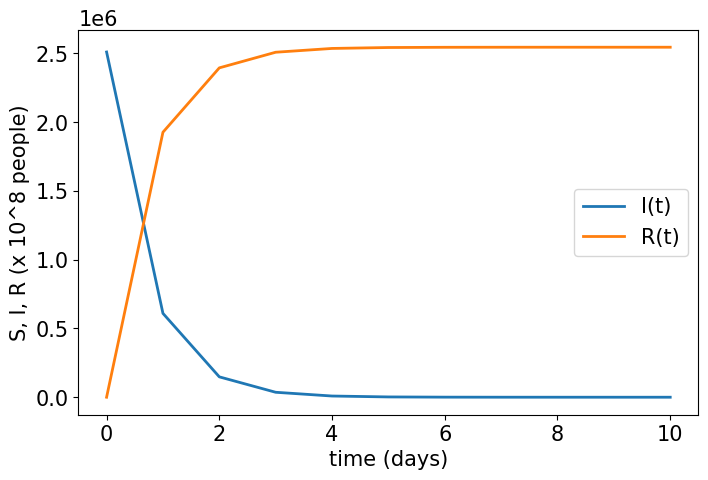

Figure: The graph above visualizes the simulated response to COVID 
        within the population of UP, India in Year 2021 after the distribution of the vaccine.
        We see how within the first week the infected population drastically decreases and recovered people increase.
        The x-axis is labelled as time (days) as independent variable. 
        The y-axis is labelled as I, and R (people) and the decimal value is x10^8.
        I(t), and R(t) vary as the continuous functions of time, 
        showing the change in infected, and recovered people
        in the population of UP, India, from COVID in 2021. 
        The legend associates S, I, and R with respective line color on the graph (blue, orange, green)


In [407]:
# Case 3: "infection_rate" = 0.0106 and "recovery_rate = 0.7676"

# above calculated values of the parameters b and k from data on COVID after vaccine distribution for the state of UP in India.
infection_rate = 0.0106
# as 0.0106 = 1/100 an infected individual infects 1 susceptible person every 100 days on average, 

recovery_rate = 0.7676
# as, recovery time = 1/rate = 1/0.7676 = 1.3 days
# Hence, an individual in India recovers from COVID in a day and a half on average. 

#inputs initial conditions as values for S, I, and R: 

I0 = 2509234 # total positive cases in UP, India in 2021 (source: WHO, 2021)
S0 = 237095024 - I0 # total population of UP, India in 2020 being 237 million (Bagal et al., 2020)
R0 = 0 # we initialize zero recoveries at the start of the simulation

#stores the values in the variable
initial_vals = [S0,I0,R0]
 
#recalls the function to run the simulation of Euler's method,
#this executes all the commands in the function
SIR_Euler(infection_rate, recovery_rate, initial_vals)
#the function has three parameters: 
#infection_rate (b), recovery_rate (k), initial_vals (of S, I, and R)

The Figure above shows the projected drastic decrease in the number of infected individuals after efficiently and effectively delivering the COVID vaccination in the state of UP, India. The graph shows that with an increase in the recovery rate, and a lower infection rate, the spike in COVID cases settles after affecting millions in UP, India once the vaccine is distributed and herd immunity is developed.<br>

***Limitations*** <br>
The SIR model is a simple mathematical model that can be used to predict the spread of infectious diseases.
However, this is a mere simplified version, and onground reality can vary, due to following assumptions of this model:<br>
1. The results are based on the assumption that the vaccine is distributed efficiently and effectively to the entire population of Uttar Pradesh, India. 
2. The results are also based on the assumption that the vaccine is effective in preventing the spread of COVID-19 and that the population is willing to receive the vaccine. 3. 3. We have not considered the impact of new COVID-19 variants in our analysis. These factors can significantly impact the results and should be considered when interpreting the results.
4. We have not considered that a person can be reinfected with COVID.<br>
2. Death is not considered and people are just considered immuno-recovered.<br>
3. Factors affecting k, such as vaccines are not considered (vaccines could increase recovery rate).<br>
4. Factors affecting b, such as quarantine are not considered (quarantinting infected people could reduce infection rate).<br>

These factors limit the applicability of the SIR model in real-life as is. However, we must note that SIR model is just to give a visual estimated simulation of what a potential outbreak could look like to prepare for it, e.g. increase healthcare like beds in hospitals, develop and effectively distribute vaccines etc. to try to control the outbreak.<br>


<font color='orange'>**Conclusive Remarks**</font>


The main aim of the paper to distribute the vaccine efficiently using a Genetic Algorithm. We recomment the optimal route of 'Lucknow', 'Gorakhpur', 'Varanasi', 'Prayagraj', 'Kanpur', 'Jhansi', 'Bareilly', 'Firozabad', 'Agra', 'Aligarh', 'Noida', 'Ghaziabad', 'Meerut', 'Moradabad', 'Saharanpur' to deliver the COVID vaccine to 15 major cities with outbreaks in UP, India. The total distance for this journey is about 2175.7 kilometers by road. <br>

Our SIR model above can also be used to evaluate the response of COVID, or any disease in general, spread in a population. It shows how susceptible people are infected and Infectious people increase exponentially till a spike is reached and then herd immunity is developed in population after a certain time.<br>
We show the effect of the vaccine on the spread of COVID in the population. The results show that with an increase in the recovery rate, and a lower infection rate, the spike in COVID cases forecastedly settles after affecting millions in UP, India once the vaccine is distributed and herd immunity is developed.<br>

With the COVID outbreak in 2019, and the world shutting down, it is now more important then ever for humanity to learn about such contagious diseases, how they spread and how to effectively tackle them. The SIR model gave huge insights as to how the spread of disease in a population can be simulated to prepare in advance before the situation gets out of hand. As global leaders, these tools equip us to prepare a better future for our future generations.

### References


Abdullahi, Y. M., & Nweze, O. N. (2011). A simulation of an sir mathematical model of HIV transmission dynamics using the classical Euler's method.

Bagal, D. K., Rath, A., Barua, A., & Patnaik, D. (2020, January 1). Estimating the parameters of sir model of COVID-19 cases in India during lock down periods. medRxiv. https://doi.org/10.1101/2020.06.03.20120899 

Din RU, Algehyne EA. Mathematical analysis of COVID-19 by using SIR model with convex incidence rate. Results Phys. 2021 Apr;23:103970. doi: 10.1016/j.rinp.2021.103970. Epub 2021 Feb 19. PMID: 33623731; PMCID: PMC7893319.

Google Maps (2022).

Griffiths, D.F., Higham, D.J. (2010). Euler’s Method. In: Numerical Methods for Ordinary Differential Equations. Springer Undergraduate Mathematics Series. Springer, London. https://doi.org/10.1007/978-0-85729-148-6_2

WHO. (2021). India: WHO coronavirus disease (covid-19) dashboard with vaccination data. World Health Organization. https://covid19.who.int/region/searo/country/in 

Yadav, R. S. (2020, January 1). Mathematical modeling and simulation of sir model for covid-2019 epidemic outbreak: A case study of India. medRxiv. https://doi.org/10.1101/2020.05.15.20103077 

